# Processing Mass Spectrometry Imaging (MSI) data
In chapter 2 we looked at how to process spectra and put them into a nicely aligned feature table. In this chapter, we will explore the capabilities of the `MSI` class (which is strongly related to the `XRF` class, so a lot of functionality is shared). In detail, we will cover the following topics:
* initializing `MSI` objects
* filtering
* clustering

## Initializing `MSI` objects
The `MSI` objects are strongly linked to .d folders, which is why the folder structure is used. You have to provide the .d-folder upon initialization. Optionally, you can also provide the mis file, which stores information about the measured region with respect to the photo, but as long as only one mis file is located in the .i-folder, this will not be necessary. We will use the toy example from chapter 2, but feel free to replace it with your own data.

Let's start with the setup

In [1]:
from msi_workflow import MSI, Spectra

path_d_folder = r'C:\Users\Yannick Zander\Promotion\Test data\13012023_SBB_TG3A_05-10_Test2.d'

msi = MSI(path_d_folder=path_d_folder)

### Providing the `Spectra` object
Let's first look at the recommended way, which is to provide the processed spectra object

did not find x_ROI in Index(['544.0159', '544.0313', '544.0448', '544.0539', '544.0891', '544.1285',
       '544.1498', '544.1656', '544.1813', '544.1933',
       ...
       '563.7674', '563.826', '563.8415', '563.876', '563.8928', '563.9232',
       '563.9855', 'R', 'x', 'y'],
      dtype='object', length=1053), attempting to find "x" and "y"


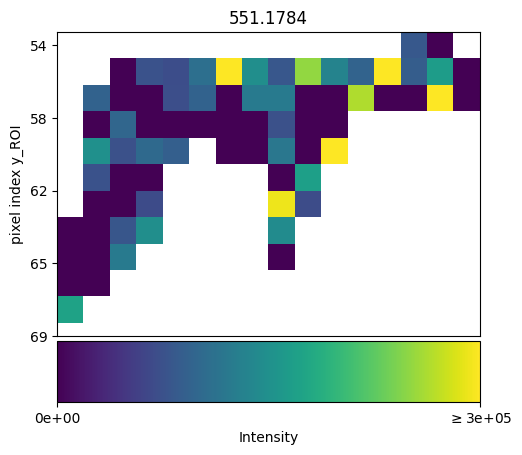

In [2]:
spec = Spectra(path_d_folder=path_d_folder, initiate=False)
spec.load()

msi.set_feature_table_from_spectra(spec)

# to check that this worked, let's plot the compound with the highest TIC
comp_max = msi.data.columns[msi.data.mean(axis=0).argmax()]
msi.plot_comp(comp_max, flip=True)

### Injecting a feature table

Less pretty is to just set the feature table (for example, if you are coming from the legacy [msi_feature_extraction](https://github.com/weimin-liu/msi_feature_extraction) workflow, all that is required as a `pd.DataFrame` with compounds as strings and *R*, *x* and *y* columns)

did not find x_ROI in Index(['1000.1234', 'x', 'y', 'R'], dtype='object'), attempting to find "x" and "y"


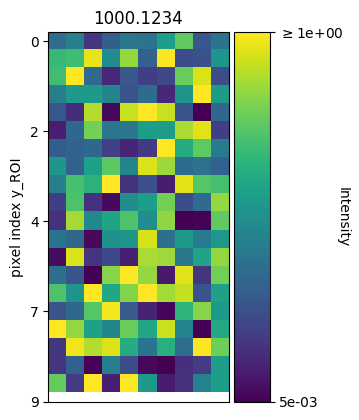

In [3]:
import numpy as np
import pandas as pd

# generate some random test data
nx = 20
ny = 10
y, x = np.indices((ny, nx))
vals = np.random.random(ny * nx)
df = pd.DataFrame({'1000.1234': vals, 'x':x.ravel(), 'y': y.ravel(), 'R': np.zeros_like(vals)})

test = MSI(path_d_folder=path_d_folder)

test._feature_table = df

test.plot_comp(1000.1234, flip=True)

## Filtering
In chapter 2 we saw how spurious intensity values could be eliminated. This time, filtering will focus on removing **compounds** that are likely not meaningful.

We will use the `get_sparsed` method to throw out compounds that contain more zeros than allowed by our defined threshold. Note that we don't always have the luxury of filtering this way. Sometimes measurements just yield very few successful shots (below 20%)

In [4]:
print(f"compounds before filtering: {msi.data.shape[1]}")
msi._feature_table = msi.get_sparsed(th_nonzero=.1)
print(f"compounds after filtering: {msi.data.shape[1]}")

compounds before filtering: 1050
compounds after filtering: 727


## Clustering
The `Data` classes allow us to perform *k-means clustering*, *principal component analysis (PCA)*, and *nonnegative matrix factorization (NMF)* without overhead and comfortable plotting. For this toy example, the results are not very meaningful, this is merely to demonstrate the syntax.

### k-means

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\Yannick Zander\Downloads\WPy64-31180\python-3.11.8.amd64\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Users\Yannick Zander\Downloads\WPy64-31180\python-3.11.8.amd64\Lib\site-packages\ipykernel\ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\Yannick Zander\Downloads\WPy64-31180\python-3.11.8.amd64\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Yannick Zander\Downloads\WPy64-31180\python-3.11.8.amd64\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\Yannick Zander\Downloads\WPy64-31180\python-3.11.8.amd64\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeErr

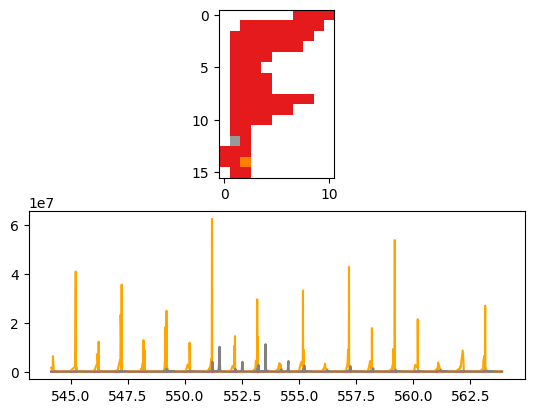

In [5]:
msi.estimate_kmeans(n_clusters=3)
msi.plot_kmeans()

### PCA

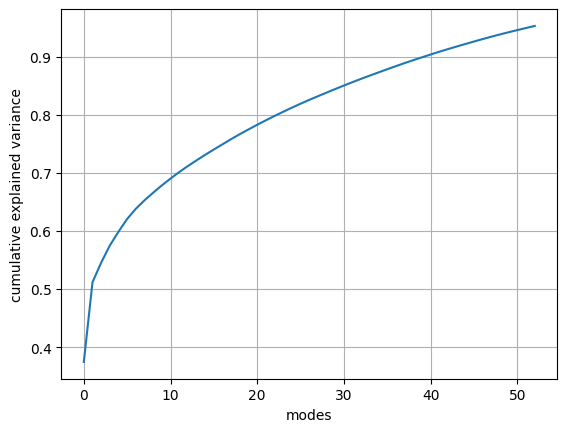

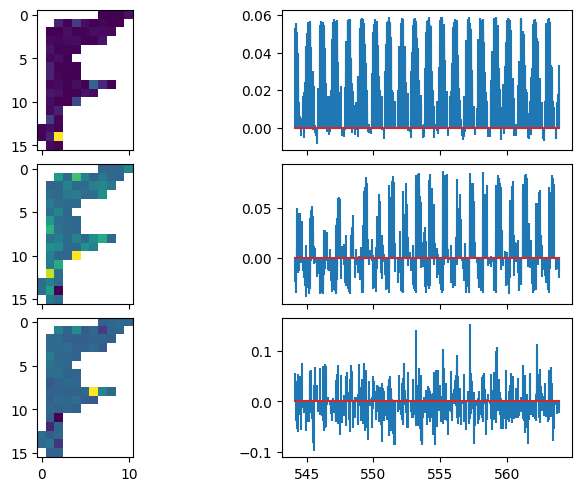

In [7]:
msi.estimate_pca()
msi.plot_pca(n_top=3)

### NMF
Helper function to find the elbow-point 

In [8]:
msi.nmf_find_k()

ValueError: not enough values to unpack (expected 3, got 2)

<Figure size 640x480 with 0 Axes>

We will use 4.

In [ ]:
msi.estimate_nmf(k=4)
msi.plot_nmf()